In [ ]:
import pandas as pd
df=pd.read_csv("/home/indresh/PycharmProjects/MLCoursera/DataSet/Salaries.csv")
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly_x=poly.fit_transform(x)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(poly_x,y)
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(poly.fit_transform(x)),color='blue')
plt.show()

3.293351887947393
0.9845143345421614


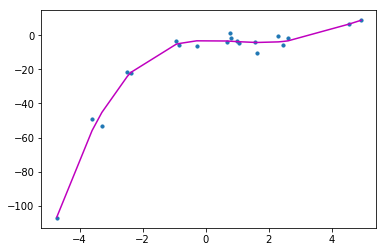

In [4]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#print (x)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

def generate_data_set():
    np.random.seed(0)
    x = 2 - 3 * np.random.normal(0, 1, 20)
    y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    return x, y

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  X_train, Y_train = generate_data_set()
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  Y_train_predict = poly_model.predict(poly_features.fit_transform(X_train))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_train, Y_train_predict))
  r2_test = r2_score(Y_train, Y_train_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 10.120437473614711
R2 score of training set is 0.8537647164420812


The model performance for the test set
-------------------------------------------
RMSE of test set is 10.120437473614711
R2 score of test set is 0.8537647164420812
